Welkom to the notebook of **clustimage**!



The aim of ***clustimage*** is to detect natural groups or clusters of images. It works using a multi-step proces of carefully pre-processing the images, extracting the features, and evaluating the optimal number of clusters across the feature space. The optimal number of clusters can be determined using well known methods suchs as silhouette, dbindex, and derivatives in combination with clustering methods, such as agglomerative, kmeans, dbscan and hdbscan. With clustimage we aim to determine the most robust clustering by efficiently searching across the parameter and evaluation the clusters. Besides clustering of images, the clustimage model can also be used to find the most similar images for a new unseen sample.



**More information:**
* [API documentations](https://erdogant.github.io/clustimage/)
* [Github](https://github.com/erdogant/clustimage)

**Installation of libraries**

In [14]:
!pip install -U clustimage

  Cloning https://github.com/erdogant/clustimage.git to /tmp/pip-install-95ohqy1e/clustimage_be467901912140118d34741f48f64489
  Running command git clone -q https://github.com/erdogant/clustimage.git /tmp/pip-install-95ohqy1e/clustimage_be467901912140118d34741f48f64489


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from clustimage import Clustimage

In [16]:
import clustimage
print(clustimage.__version__)

1.3.6


**Example of pre-processing images for color scale, value scaling, resizing and vectorizing.**

[clustimage] >INFO> Extracting files..
[clustimage] >INFO> [210] files are collected recursively from path: [/usr/local/lib/python3.7/dist-packages/clustimage/data/flower_images]


[ 14  20  15 ...  50 107  90]
49152


(-0.5, 127.5, 127.5, -0.5)

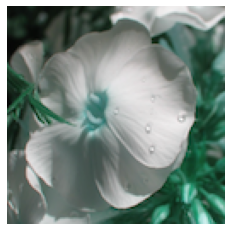

In [3]:
# Initialize
cl = Clustimage()

# Load example dataset
pathnames = cl.import_example(data='flowers')

# Preprocessing of the first image
# 0: cv2.IMREAD_GRAYSCALE
# 1: cv2.IMREAD_COLOR
img = cl.imread(pathnames[0], dim=(128,128), colorscale=1, flatten=True)

# Flattened array
print(img)
# array([ 10,  22,  13, ...,  78,  74, 117], dtype=uint8)

# Length of the vector is Height x Width x #Channels (RGB) = 128*128*3
print(len(img))
# 49152

# Plot. Note that reshape is only required in case flatten=True
plt.figure()
plt.imshow(img.reshape(128,128,3))
plt.axis('off')

**Example to extract HOG features from a flower.**

[clustimage] >INFO> Extracting files..
[clustimage] >INFO> [210] files are collected recursively from path: [/usr/local/lib/python3.7/dist-packages/clustimage/data/flower_images]
[clustimage] >WARNING> The default dim=(128, 128) of the image does not match with the input: [221, 221]. Set dim=[221, 221] during initialization!
100%|██████████| 1/1 [00:00<00:00, 17.36it/s]


Text(0.5, 1.0, 'HOG')

<Figure size 432x288 with 0 Axes>

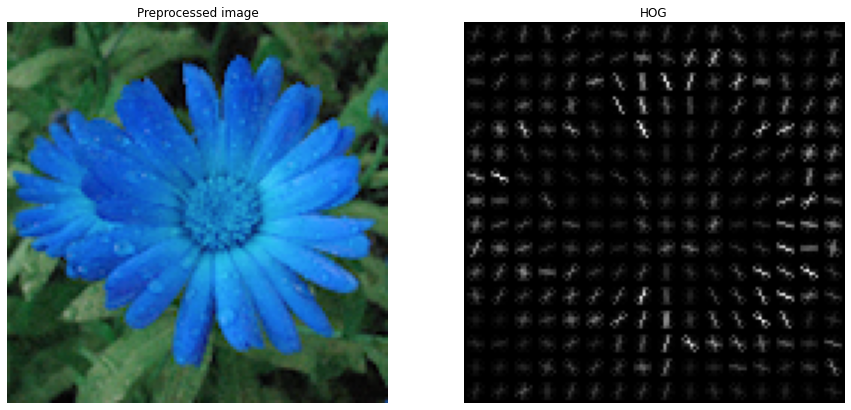

In [4]:
# Import libraries
import matplotlib.pyplot as plt
from clustimage import Clustimage

# Init
cl = Clustimage(method='hog')
# Load example data
pathnames = cl.import_example(data='flowers')

# Read image according the preprocessing steps
img = cl.imread(pathnames[10], dim=(128,128))

# Extract HOG features
img_hog = cl.extract_hog(img, pixels_per_cell=(8,8), orientations=8, flatten=False)

# Plot
plt.figure();
fig,axs=plt.subplots(1,2, figsize=(15,10))
axs[0].imshow(img.reshape(128,128,3))
axs[0].axis('off')
axs[0].set_title('Preprocessed image', fontsize=12)
axs[1].imshow(img_hog, cmap='gray')
axs[1].axis('off')
axs[1].set_title('HOG', fontsize=12)

## Cluster of the MNIST dataset

In [31]:
# init with PCA method
cl = Clustimage(method='pca',
                embedding='tsne',
                grayscale=False,
                dim=(128,128),
                params_pca={'n_components':0.95},
                store_to_disk=True,
                verbose=50)

# Load MNIST example data
X = cl.import_example(data='mnist')

# There are 1797 digits in total, each with 64 features which is the flattened 8x8 grayscale image.
print(X.shape)
# (1797, 64)

# print(X)
# array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
#        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
#        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
#        ...,
#        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
#        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
#        [ 0.,  0., 10., ..., 12.,  1.,  0.]])

# Preprocessing, feature extraction, embedding and cluster evaluation
results = cl.fit_transform(X,
                           cluster='agglomerative',
                           evaluate='silhouette',
                           metric='euclidean',
                           linkage='ward',
                           min_clust=3,
                           max_clust=25,
                           cluster_space='high')

[pca] >Column labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [64] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [29] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [64] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..

[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████| 22/22 [00:02<00:00,  9.51it/s]


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [14].
[clusteval] >Fin.


In [33]:
cl.results.keys()

dict_keys(['feat', 'xycoord', 'pathnames', 'filenames', 'labels'])

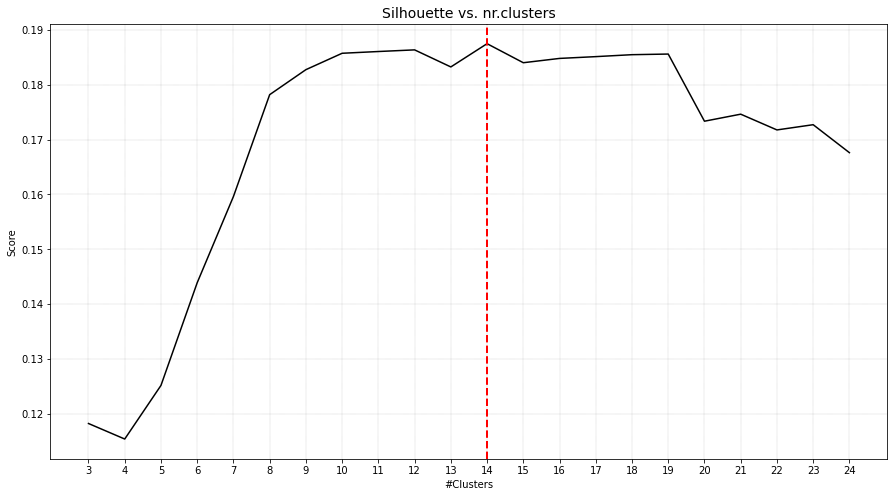

[clusteval] >Estimated number of n_clusters: 14, average silhouette_score=0.176


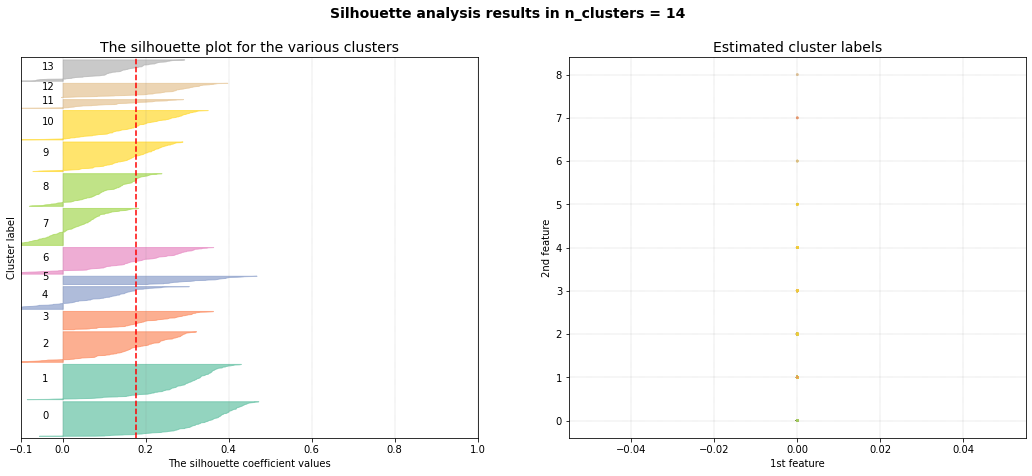

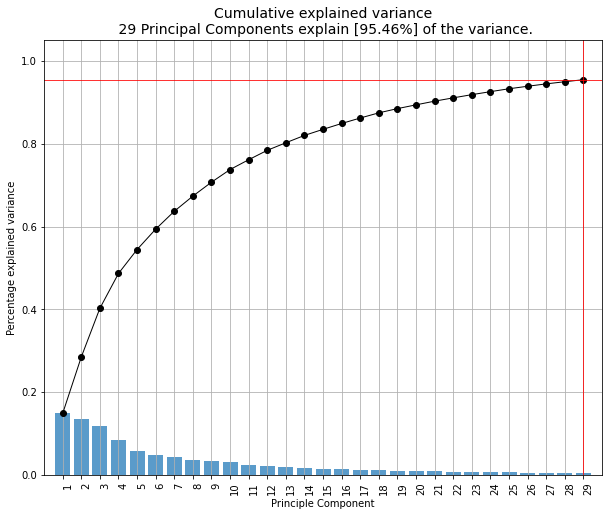

<Figure size 432x288 with 0 Axes>

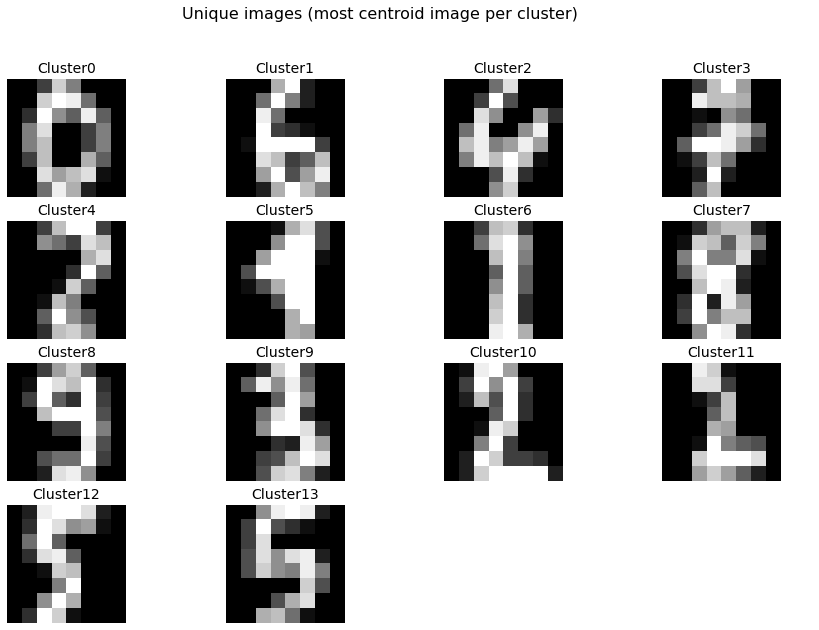

[clusteval] >Plotting the dendrogram with optimized settings: metric=euclidean, linkage=ward, max_d=3362.816. Be patient now..
[clusteval] >Compute cluster labels.


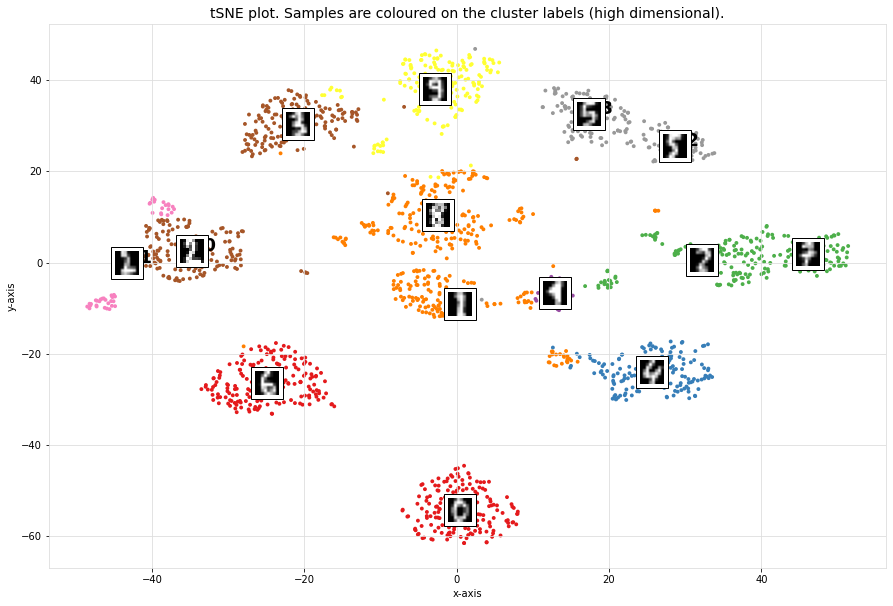

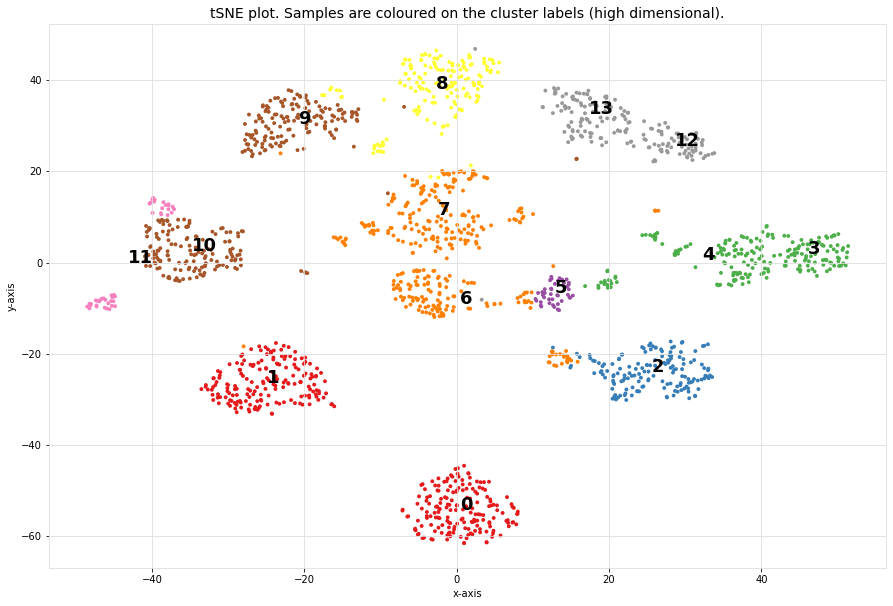

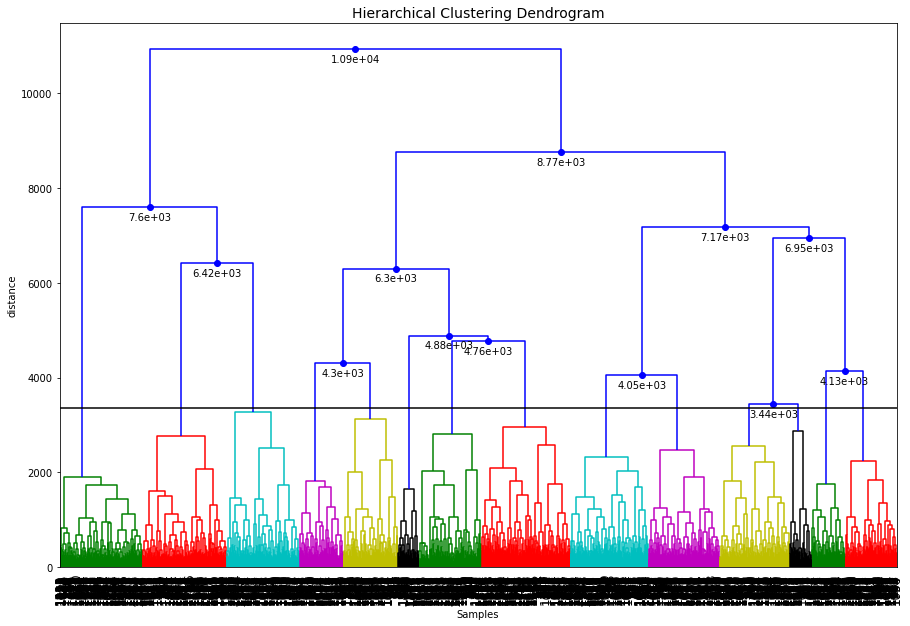

In [34]:
# Silhouette plots
cl.clusteval.plot()
cl.clusteval.scatter(X)

# PCA explained variance plot
cl.pca.plot()

# Plot unique image per cluster
cl.plot_unique(img_mean=False)

# Scatterplot
cl.scatter(zoom=3, img_mean=False)
cl.scatter(zoom=None, img_mean=False)

# Plot images per cluster or all clusters
#cl.plot(cmap='binary', labels=[1,2])

# Dendrogram
cl.dendrogram()


## Cluster MNist dataset with HOG features


[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████| 22/22 [00:02<00:00,  9.15it/s]


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [16].
[clusteval] >Fin.


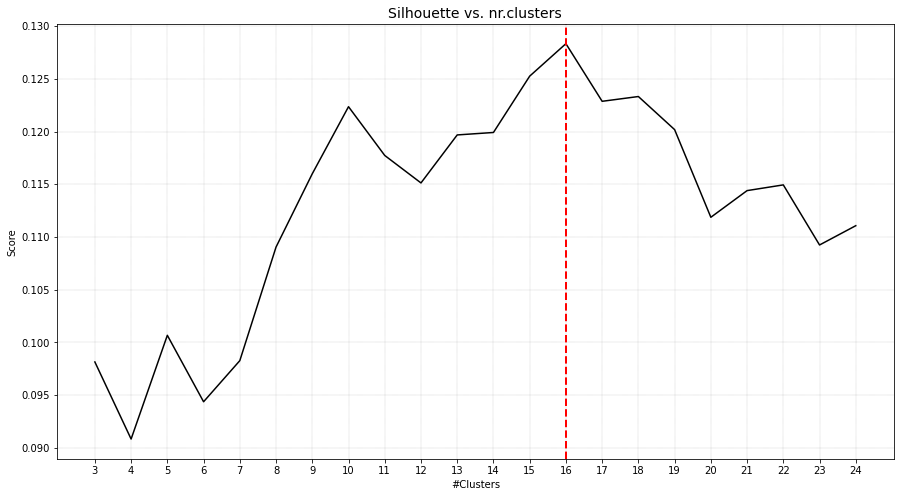

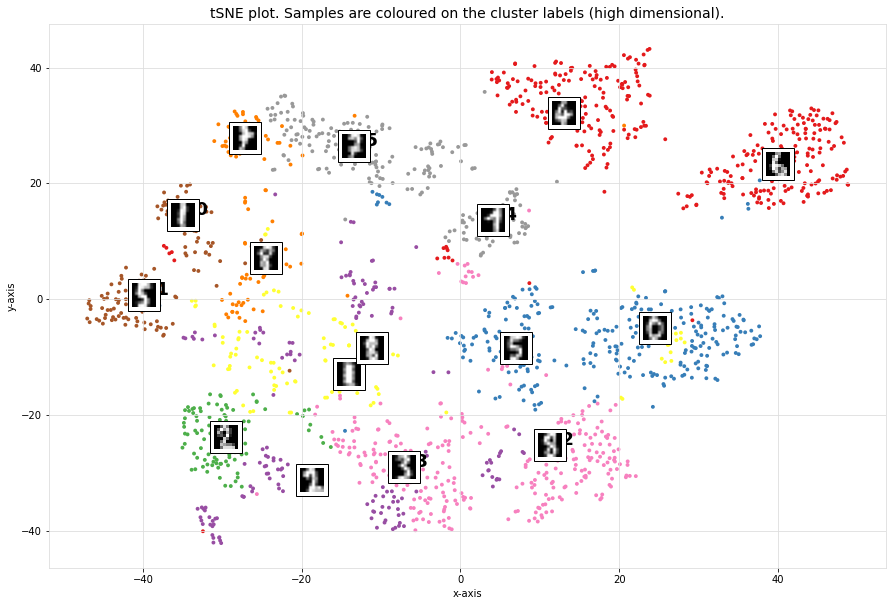

In [35]:
# init with HOG method
cl = Clustimage(method='hog', params_hog={'pixels_per_cell':(2,2)}, verbose=50)

# Load MNIST example data
X = cl.import_example(data='mnist')

# Preprocessing, feature extraction, embedding and cluster evaluation
results = cl.fit_transform(X)

# Plot
cl.clusteval.plot()
cl.scatter(zoom=3, img_mean=False)

## Clustering Flower dataset


[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████| 10/10 [00:00<00:00, 19.92it/s]


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [6].
[clusteval] >Fin.


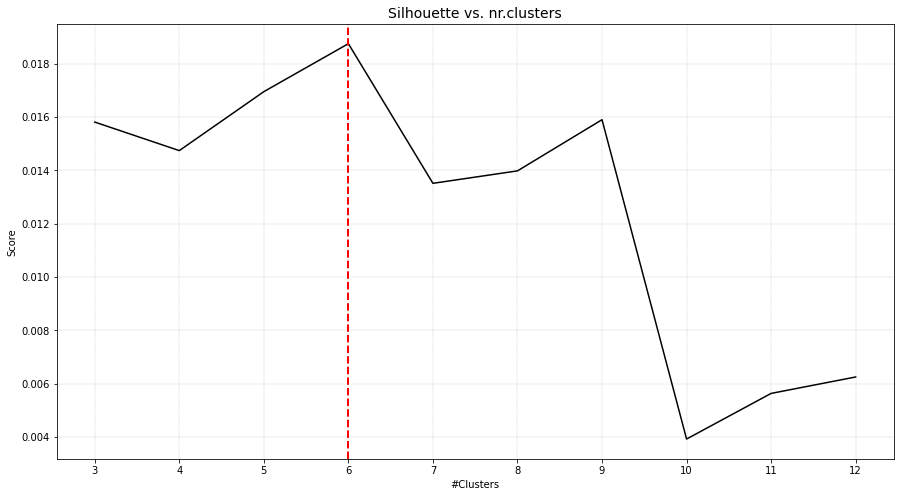

[clusteval] >Estimated number of n_clusters: 6, average silhouette_score=0.070


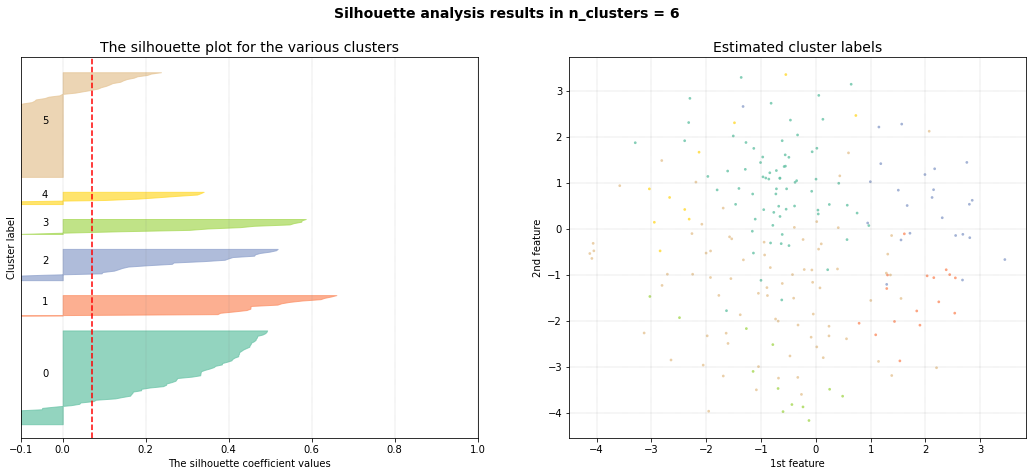

[clusteval] >Plotting the dendrogram with optimized settings: metric=euclidean, linkage=ward, max_d=1756.833. Be patient now..
[clusteval] >Compute cluster labels.


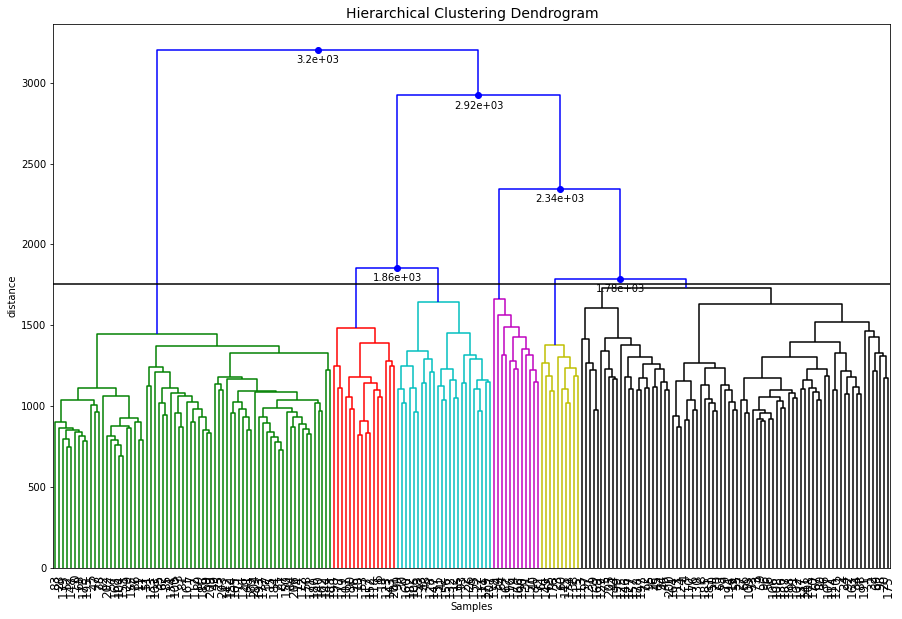

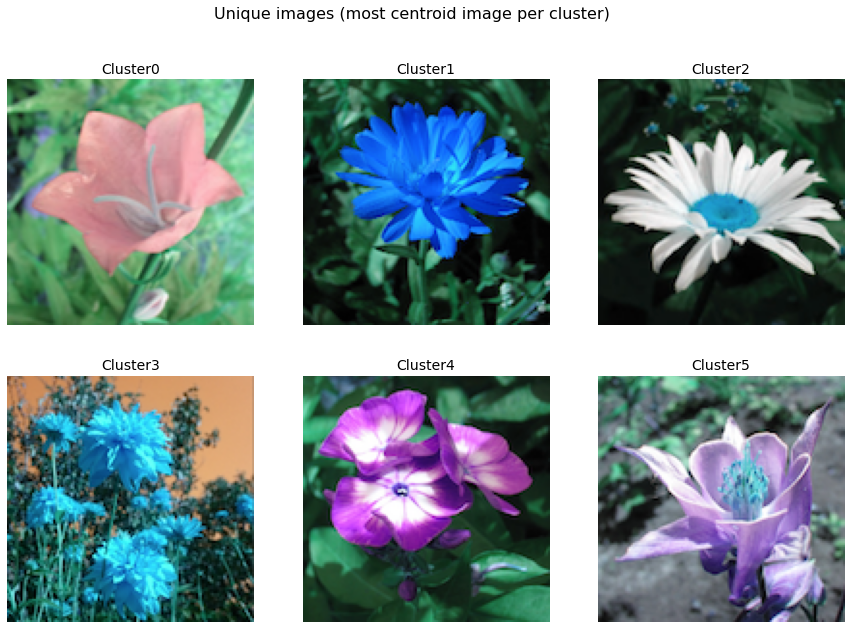

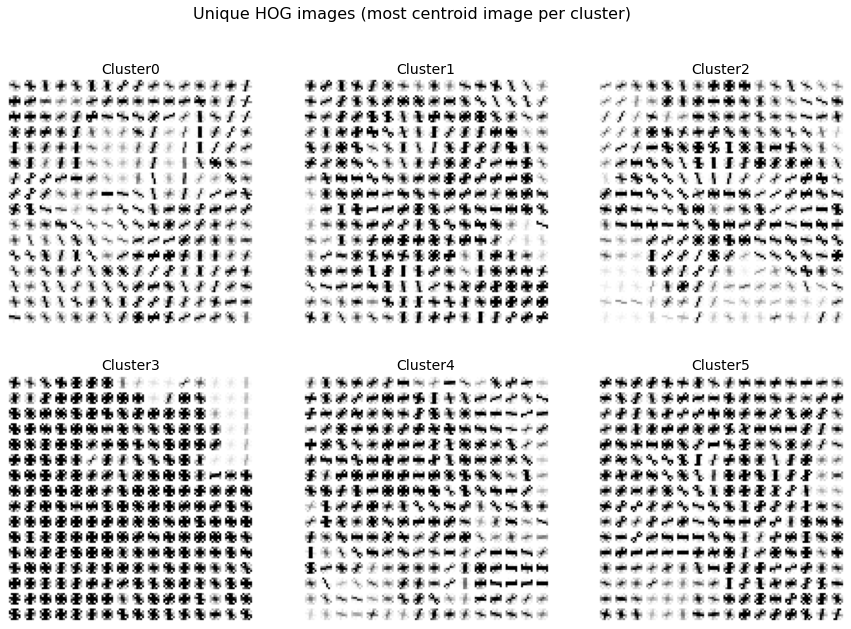

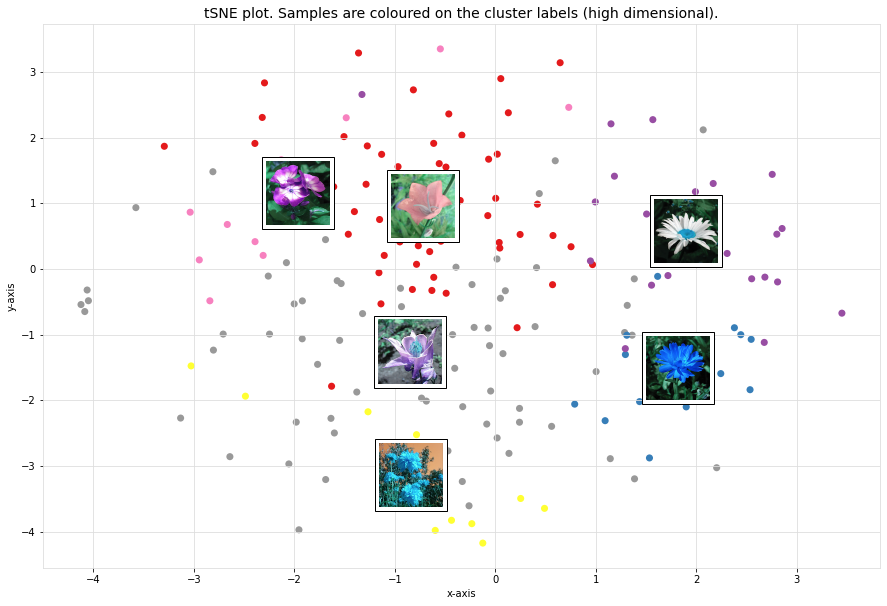

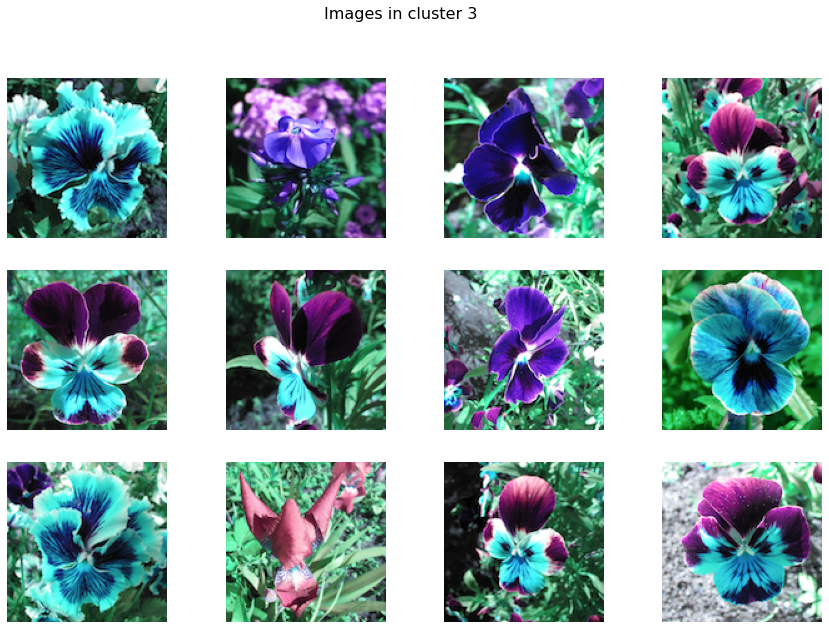

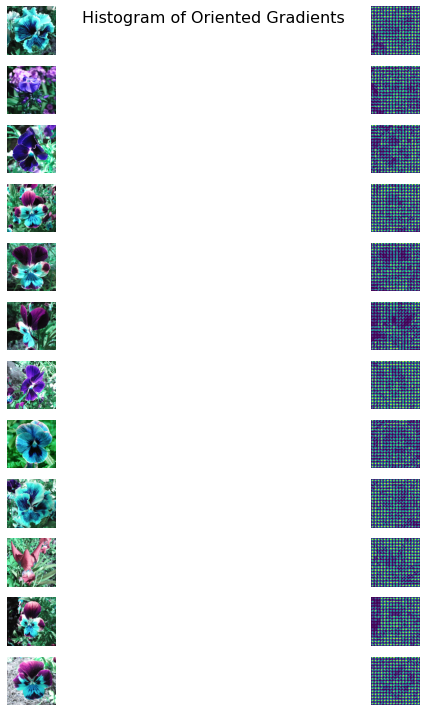

In [36]:
# Import library
from clustimage import Clustimage

# init
cl = Clustimage(method='hog', params_hog={'orientations':8, 'pixels_per_cell':(8,8)}, verbose=50)
# cl = Clustimage(method='pca-hog')

# load example with flowers
pathnames = cl.import_example(data='flowers')

# Cluster images using the input pathnames.
results = cl.fit_transform(pathnames, min_clust=3, max_clust=13)

# If you want to experiment with a different clustering and/or evaluation approach, use the cluster functionality.
# This will avoid pre-processing, and performing the feature extraction of all images again.
# You can also cluster on the 2-D embedded space by setting the cluster_space parameter 'low'
#
# cluster(cluster='agglomerative', evaluate='dbindex', metric='euclidean', linkage='ward', min_clust=3, max_clust=13, cluster_space='high')

# Make various plots:

# Silhouette plots
cl.clusteval.plot()
cl.clusteval.scatter(cl.results['xycoord'])

# PCA explained variance plot
# cl.pca.plot()

# Dendrogram
cl.dendrogram()

# Plot unique image per cluster
cl.plot_unique(img_mean=False, show_hog=True)

# Scatterplot
cl.scatter(dotsize=50, zoom=0.5, img_mean=False)

# Plot images per cluster or all clusters
cl.plot(labels=3, show_hog=True)

## Clustering of Faces

[pca] >Column labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [4096] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [127] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [4096] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..

[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████| 16/16 [00:00<00:00, 92.57it/s]

[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [19].
[clusteval] >Fin.


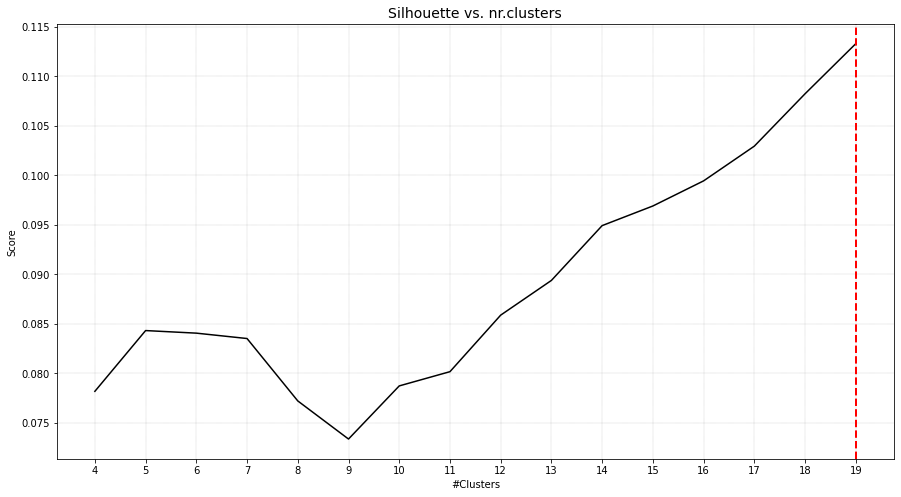

[clusteval] >Estimated number of n_clusters: 19, average silhouette_score=0.146


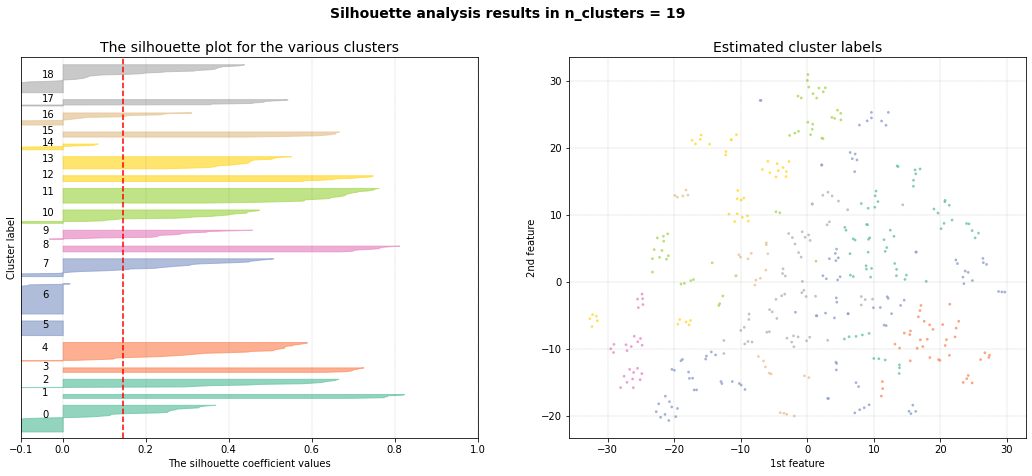

[clusteval] >Plotting the dendrogram with optimized settings: metric=euclidean, linkage=ward, max_d=8195.065. Be patient now..
[clusteval] >Compute cluster labels.


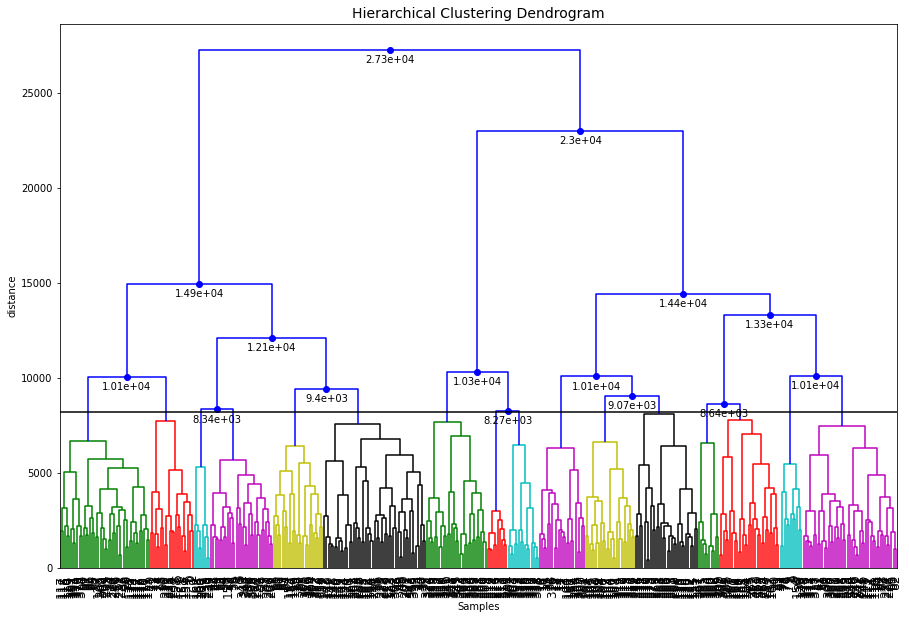

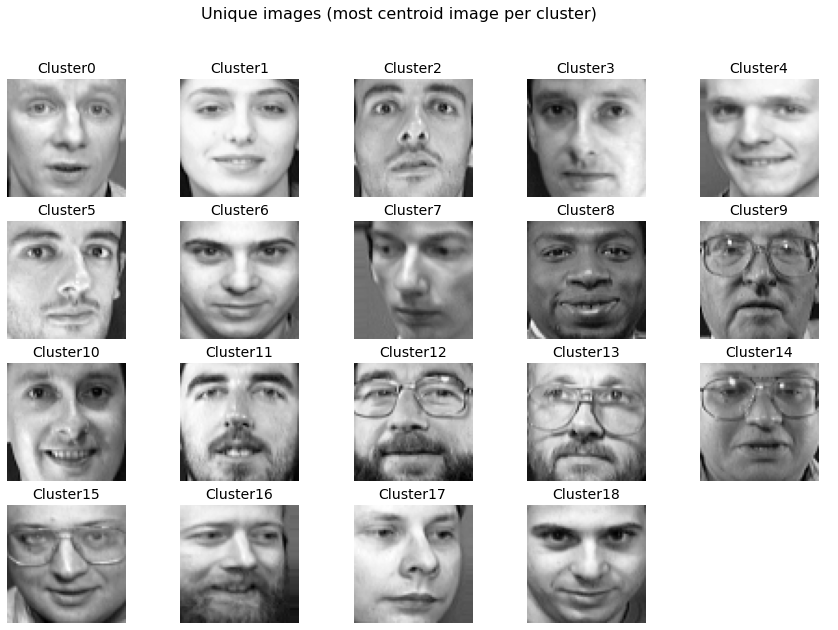

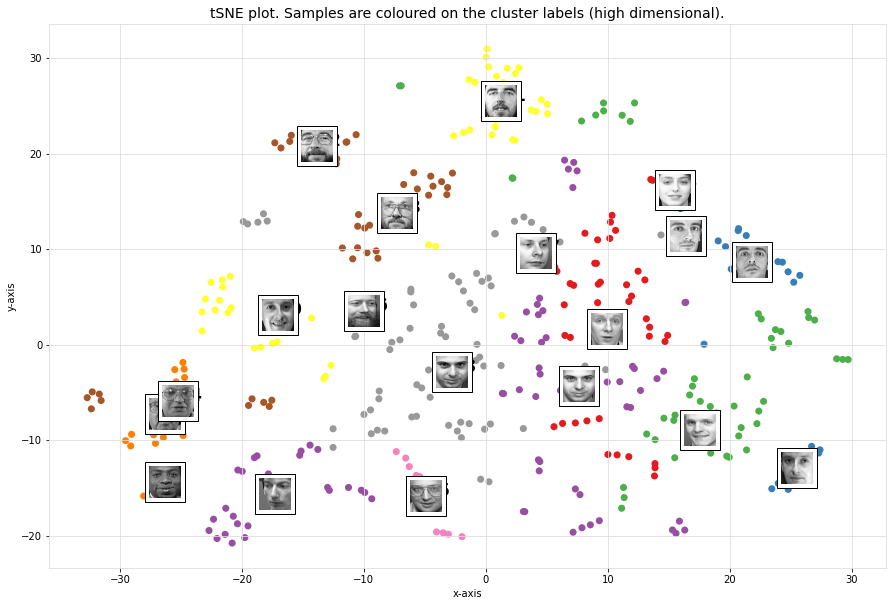

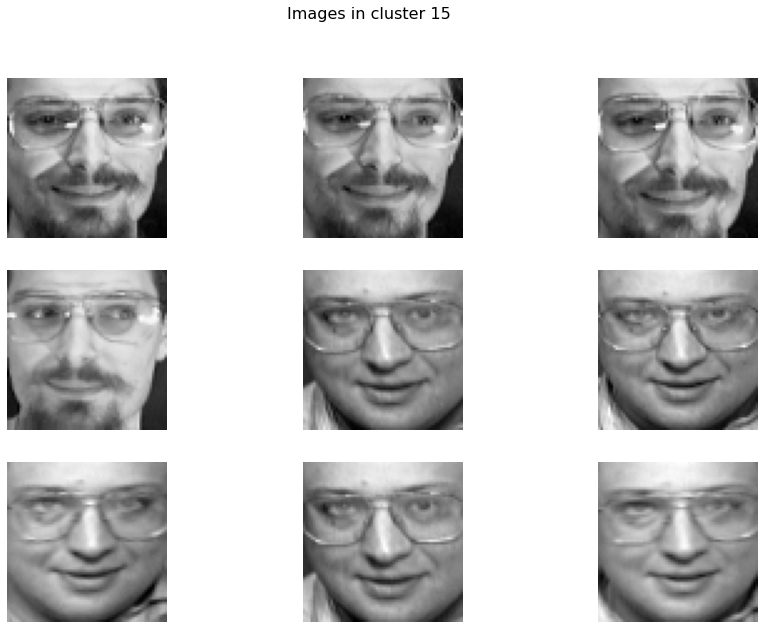

In [38]:
# Import library
from clustimage import Clustimage

# init
cl = Clustimage(method='pca', grayscale=False, dim=(64,64), verbose=50)

# Load example with faces
X = cl.import_example(data='faces')

# Preproceesing, cluster detection
results = cl.fit_transform(X, min_clust=4, max_clust=20)

# Make various plots:

# Silhouette plots
cl.clusteval.plot()
cl.clusteval.scatter(cl.results['xycoord'])

# Dendrogram
cl.dendrogram()

# Plot unique image per cluster
cl.plot_unique(img_mean=False)

# Scatterplot
cl.scatter(dotsize=50, zoom=0.5, img_mean=False)

# Plot images per cluster or all clusters
cl.plot(labels=15)

## Finding similar images


[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████| 22/22 [00:01<00:00, 19.73it/s]


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [6].
[clusteval] >Fin.
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm   ] [0.00 sec] [RSS: 0.0000011] [loc=1161.782 scale=167.827]
[distfit] >[expon  ] [0.00 sec] [RSS: 0.0000463] [loc=0.000 scale=1161.782]
[distfit] >[uniform] [0.00 sec] [RSS: 0.0000379] [loc=0.000 scale=1856.661]
[distfit] >[gamma  ] [1.03 sec] [RSS: 0.0000023] [loc=-1368.469 scale=13.297]
[distfit] >[t      ] [0.80 sec] [RSS: 0.0000014] [loc=1163.011 scale=168.392]
[distfit] >Compute confidence interval [parametric]


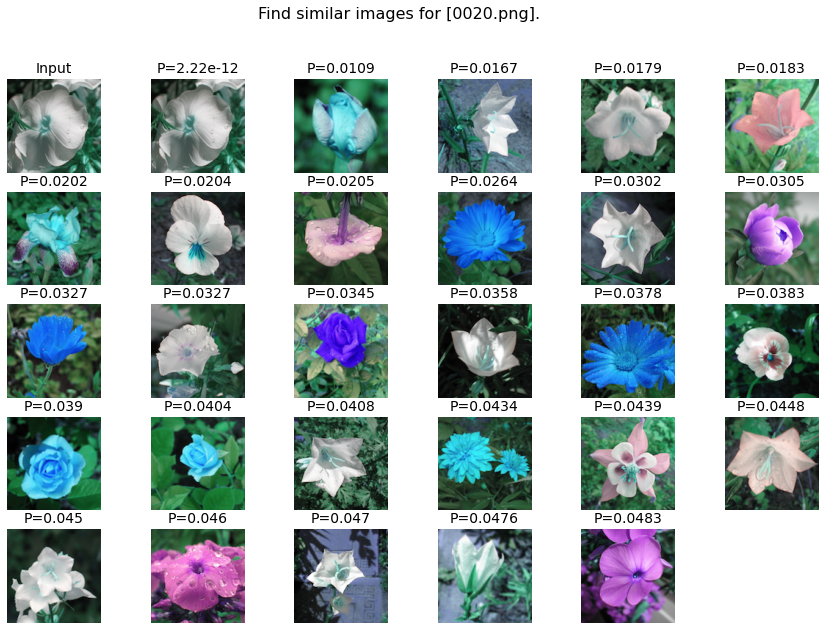

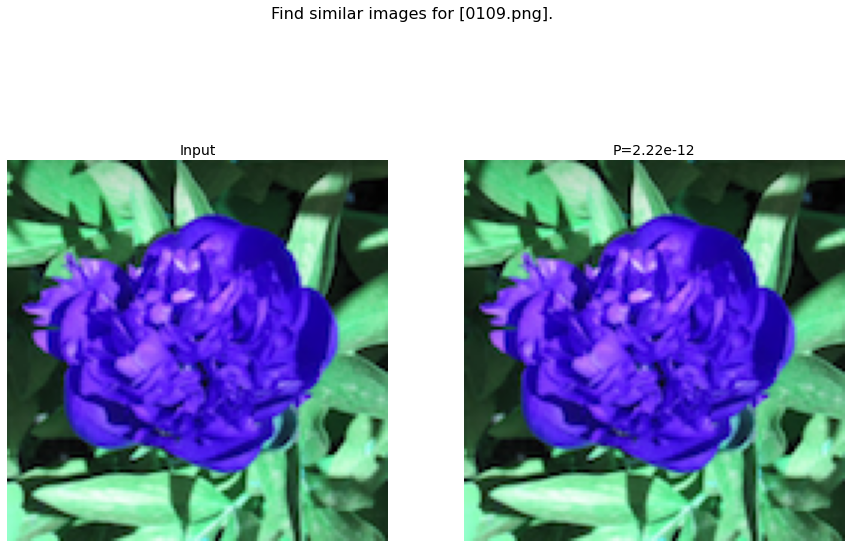

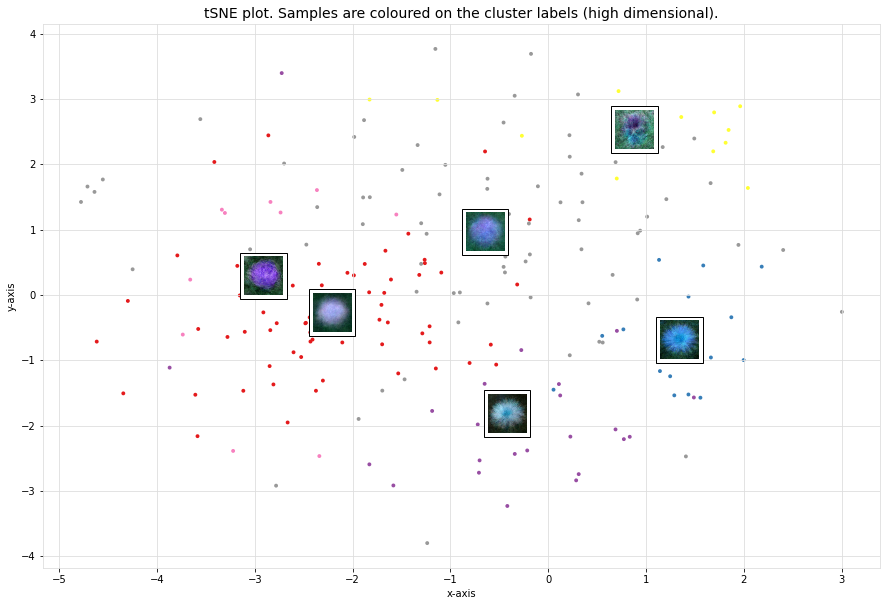

In [40]:
# Import library
from clustimage import Clustimage

# Init with settings such as PCA
cl = Clustimage(method='hog', verbose=50)

# load example with flowers
pathnames = cl.import_example(data='flowers')

# Cluster flowers
results = cl.fit_transform(pathnames)

# Read the unseen image. Note that the find functionality also performs exactly the same preprocessing steps as for the clustering.
results_find = cl.find(pathnames[0:2], k=0, alpha=0.05)

# Show whatever is found. This looks pretty good.
cl.plot_find()
cl.scatter()

**Fin notebook**